Multivariate analysis of variance (MANOVA) is an extension of the univariate analysis of variance (ANOVA).  In an ANOVA, we examine for statistical differences on one continuous dependent variable by an independent grouping variable.  The MANOVA extends this analysis by taking into account multiple continuous dependent variables, and bundles them together into a weighted linear combination or composite variable.  The MANOVA will compare whether or not the newly created combination differs by the different groups, or levels, of the independent variable.  In this way, the MANOVA essentially tests whether or not the independent grouping variable simultaneously explains a statistically significant amount of variance in the dependent variable.

In [13]:
# Install libraries
import pandas as pd
import numpy as np
import statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy 
from scipy.stats import mannwhitneyu, fisher_exact, ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

plt.rcParams['figure.figsize'] = (8.0, 7.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


print("libraries installed succesfully!")

libraries installed succesfully!


In [14]:
# load dataset
df = pd.read_csv('Leinhardt.csv', encoding = 'unicode_escape')
df.dropna()
df.head()

,Unnamed: 0,income,infant,region,oil
0,Australia,3426,26.7,Asia,no
1,Austria,3350,23.7,Europe,no
2,Belgium,3346,17.0,Europe,no
3,Canada,4751,16.8,Americas,no
4,Denmark,5029,13.5,Europe,no


## One-Way MANOVA: Relationship between income per capital and infant mortatility in realtion to region

In [15]:
maov = MANOVA.from_formula('income+infant~region', data = df)

print(maov.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
        Intercept        Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.4625 2.0000 96.0000 55.7795 0.0000
          Pillai's trace 0.5375 2.0000 96.0000 55.7795 0.0000
  Hotelling-Lawley trace 1.1621 2.0000 96.0000 55.7795 0.0000
     Roy's greatest root 1.1621 2.0000 96.0000 55.7795 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
         region         Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.4454 6.0000 192.0000 15.9501 0.0000
         Pillai's trace 0.5864 6.0000 194.0000 13.4122 0.0000
 Hotelling-Lawley trace 1.

From the MANOVA table we see that the p-value (Wilks' lambda) for study technique is << 0.05 (Stats significant). Since this value is less than 0.05, we can reject the null hypothesis that each of the region leads to the same average infant mortality +per capital income.

Wilks lmbda t-statistics is appropriate if the homogeneity of variance and covariance of data is assumed! Since initial analysis shows stat significant we have to perform further univariate anova study for each of the dependent variables. It is important to note that for each univariate test the p-value will be compared to the threhold set for MANOVA(i.e. 0.005) divided by number of dependent varaibles in the model. This is to avoid type 1 errors.

In [16]:
# Income vs region ANOVA

reg = ols('income~region', data = df).fit()

aov = sm.stats.anova_lm(reg, type =2)

print(aov)

             df        sum_sq       mean_sq          F        PR(>F)
region      3.0  9.687876e+07  3.229292e+07  29.158395  1.156919e-13
Residual  101.0  1.118575e+08  1.107500e+06        NaN           NaN


From the ANOVA table we see that the p-value for study technique is << 0.05/2 (Stats significant). Since this value is less than 0.05/2, we can reject the null hypothesis that each of the region leads to the same average per capital income.

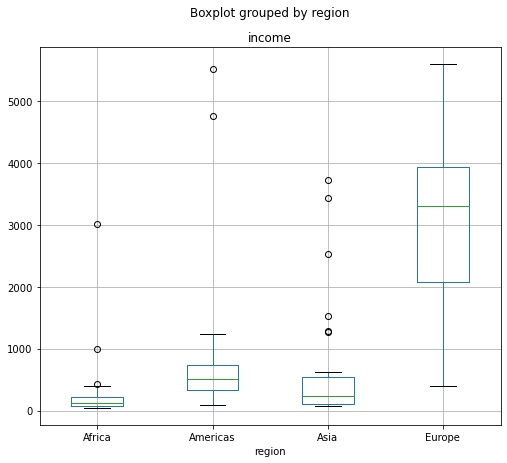

In [17]:
# box plot for marks column
df.boxplot(column='income', by = 'region')
plt.show()

Now we need to see which regions lead to us rejecting the null hypothesis using the tukeyhsd test (posthoc test)

In [18]:
mc = pairwise_tukeyhsd(df['income'], df['region'] , alpha = 0.025)
print(mc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.03      
 group1   group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------
  Africa Americas  666.6343 0.0945  -150.2706 1483.5392  False
  Africa     Asia  365.6314 0.5104  -392.2956 1123.5583  False
  Africa   Europe 2766.9869    0.0  1884.9974 3648.9764   True
Americas     Asia -301.0029 0.7311 -1139.5951  537.5893  False
Americas   Europe 2100.3527    0.0  1148.1504 3052.5549   True
    Asia   Europe 2401.3556    0.0   1499.242 3303.4691   True
--------------------------------------------------------------


## Two-Way MANOVA: Relationship between income per capital and infant mortatility in realtion to region and oil

In [19]:
maov2 = MANOVA.from_formula('income+infant~region+oil', data = df)

print(maov2.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
        Intercept        Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.4767 2.0000 95.0000 52.1370 0.0000
          Pillai's trace 0.5233 2.0000 95.0000 52.1370 0.0000
  Hotelling-Lawley trace 1.0976 2.0000 95.0000 52.1370 0.0000
     Roy's greatest root 1.0976 2.0000 95.0000 52.1370 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
         region         Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.4446 6.0000 190.0000 15.8241 0.0000
         Pillai's trace 0.5936 6.0000 192.0000 13.5049 0.0000
 Hotelling-Lawley trace 1.

From the MANOVA table we see that the p-value (Wilks' lambda) for study technique is << 0.05 (Stats significant). Since this value is less than 0.05, we can reject the null hypothesis that each of the region and oil leads to the same average infant mortality +per capital income.

Wilks lambda lies between 0 and 1 is appropriate if the homogeneity (The closer the value to Wilks lambda to 0 the more the field contributes to the model).
 Since initial analysis shows stat significant we have to perform further univariate anova study for each of the dependent variables. It is important to note that for each univariate test the p-value will be compared to the threhold set for MANOVAdivided by number of dependent varaibles in the model(i.e. 0.025) . This is to avoid type 1 errors.

In [20]:
# Income vs region + oil ANOVA

reg2 = ols('income~region+oil', data = df).fit()

aov2 = sm.stats.anova_lm(reg2, type =2)

print(aov2)

             df        sum_sq       mean_sq          F        PR(>F)
region      3.0  9.687876e+07  3.229292e+07  29.233972  1.178385e-13
oil         1.0  1.393815e+06  1.393815e+06   1.261786  2.640028e-01
Residual  100.0  1.104637e+08  1.104637e+06        NaN           NaN


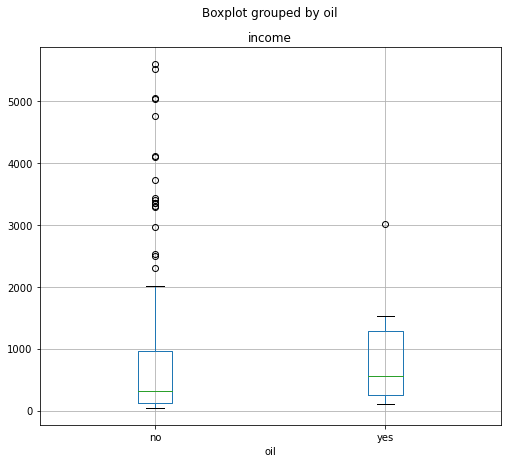

In [21]:
# box plot for marks column
df.boxplot(column='income', by = 'oil')
plt.show()

From the ANOVA table we see that the p-value for region in this study technique is << 0.05 (Stats significant). Since this value is less than 0.05, we can reject the null hypothesis that each of the region leads to the same average  per capital income.Now we need to see which regions lead to us rejecting the null hypothesis using the tukeyhsd test (posthoc test) see above

## What about the second dependent variable?

In [22]:
# Infant vs region + oil ANOVA

reg2 = ols('infant~region+oil', data = df).fit()

aov2 = sm.stats.anova_lm(reg2, type =2)

print(aov2)

            df         sum_sq       mean_sq          F    PR(>F)
region     3.0  210752.145151  70250.715050  11.799705  0.000001
oil        1.0   42197.334973  42197.334973   7.087702  0.009101
Residual  96.0  571545.511757   5953.599081        NaN       NaN


From the ANOVA table we see that the p-value for region in this study technique is << 0.05 (Stats significant). Since this value is less than 0.05, we can reject the null hypothesis that each of the region and oil leads to the same average  infant mortality.Now we need to see which regions and oils  leads us to reject null hypothesis using posthoc analysis i.e. comparing means of each caetgories


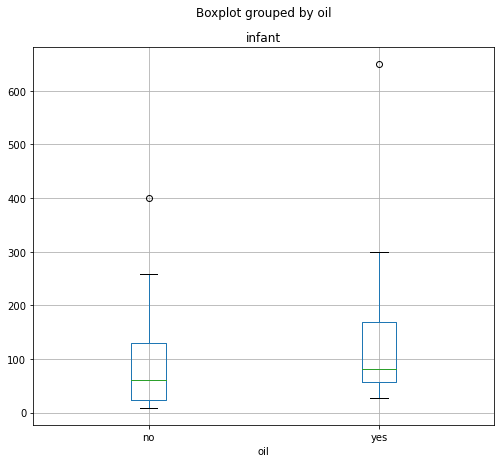

In [23]:
# box plot for marks column
df.boxplot(column='infant', by = 'oil')
plt.show()

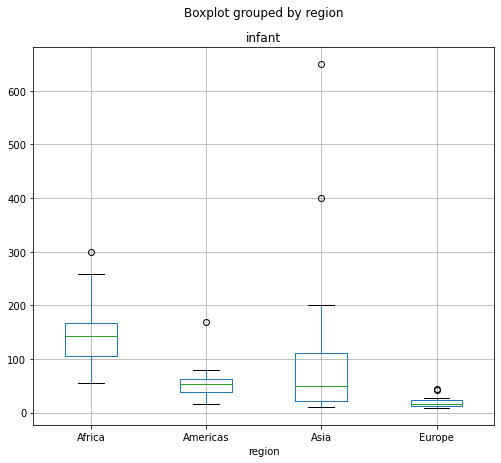

In [24]:
# box plot for marks column
df.boxplot(column='infant', by = 'region')
plt.show()